# Exploratory Analysis of Metadata from the Catalogue of St Cecilia's: Concert Hall and Music Museum
* Author: Lucy Havens
* Data Source: St Cecilia's catalogue (the data used here was cleaned in and exported from a different Jupyter Notebook)
* Dates: January - April 2019
* Project: Advanced MSc Dissertation, Design Informatics, University of Edinburgh

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pprint as pp
from matplotlib import pyplot as plt
%matplotlib inline

## Build DataFrame from clean data file

In [5]:
mimed = pd.read_csv("clean_stc_and_mimed.csv")
# mimed.set_index('Row',inplace=True)
mimed.head()

,Unnamed: 0,Id,Collection,Type,Genus,Family,Early Year,Late Year,Year Uncertainty,Country,City,Location Uncertainty
0,0,18939,10683/14558,Ophicleide,Unknown,Unknown,0,0,2,Unknown,Unknown,2
1,1,19064,10683/14558,Mouthpiece,Unknown,Unknown,0,0,2,England,London,2
2,2,18181,10683/14558,Cornet,Unknown,Unknown,0,0,2,England,London,2
3,3,176934,10683/14558,Panpipe,Flutes,Wind,1988,1988,0,Unknown,Unknown,0
4,4,176936,10683/14558,Panpipe,Flutes,Wind,1988,1988,0,Unknown,Unknown,0


In [6]:
# print(mimed.shape)
# print(list(mimed))
mimed["Early Year"].unique()

array([   0, 1988, 1610, 1770, 1801, 1830, 1901, 1879, 1835, 1865, 1909,
       1833, 1924, 1929, 1755, 1937, 1900, 1866, 1840, 1701, 1688, 1925,
       1902, 1810, 1930, 1885, 1905, 1881, 1970, 1920, 1888, 1872, 1829,
       1933, 1857, 1839, 1845, 1897, 1880, 1878, 1895, 1821, 1951, 1836,
       1850, 1864, 1860, 1903, 1843, 1794, 1935, 1989, 1875, 1934, 1965,
       1855, 1847, 1960, 1874, 1844, 1870, 1906, 1825, 1815, 1876, 1955,
       1946, 1915, 1992, 1914, 1868, 1795, 1862, 1803, 1904, 1975, 1950,
       1889, 1805, 1852, 1871, 1842, 1863, 2011, 1896, 1800, 2005, 1785,
       1918, 1967, 1766, 1700, 1696, 1820, 1963, 1695, 1780, 1735, 1882,
       1945, 1893, 1823, 1898, 1819, 1813, 1980, 1991, 1923, 1764, 1822,
       1809, 1854, 1802, 1884, 1973, 1968, 1974, 1957, 1655, 1779, 1985,
       1964, 1969, 1760, 1891, 1932, 1824, 1832, 1808, 1994, 1856, 1907,
       1798, 1910, 1971, 1928, 1861, 1807, 1750, 1919, 1858, 1913, 1926,
       1890, 1953, 1949, 1775, 2010, 1595, 1894, 18

In [10]:
all_family = mimed['Family']
family_counts = all_family.value_counts()
print(family_counts)
for f_c in family_counts:
    print(f_c/5500.0)

Wind           2983
Mouthpieces     788
Unknown         704
Strings         372
Percussion      335
Keyboard        126
Beaters          92
Bows             71
Other            21
Mechanical        5
Plectrum          2
Mirlitons         1
Name: Family, dtype: int64
0.542363636364
0.143272727273
0.128
0.0676363636364
0.0609090909091
0.0229090909091
0.0167272727273
0.0129090909091
0.00381818181818
0.000909090909091
0.000363636363636
0.000181818181818


In [4]:
sns.set(style="ticks", color_codes=True)
family_order = ["Beaters", "Bows","Keyboard","Mechanical","Mirliton","Percussion","Strings","Wind","Mouthpieces","Other","Unknown"]

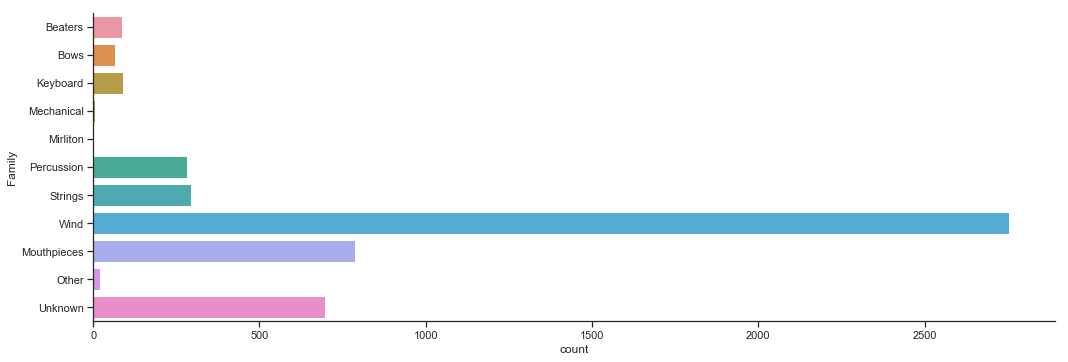

In [5]:
sns.catplot(y="Family", kind="count", data=mimed, height=5, aspect=3, order=family_order)

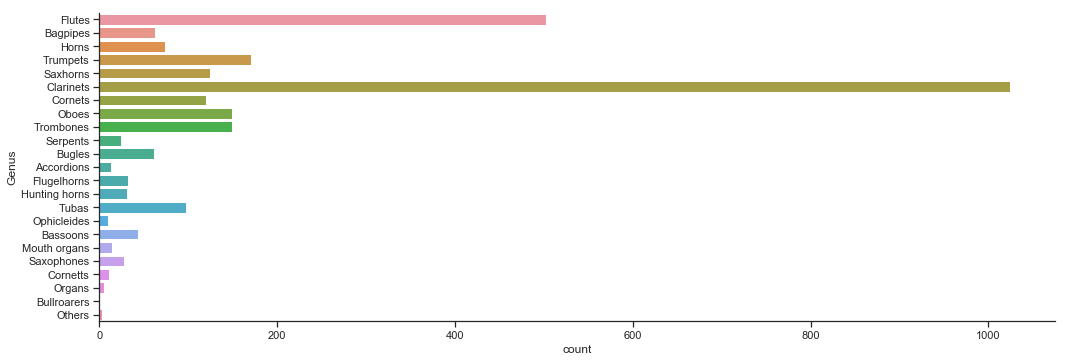

In [7]:
wind = mimed[mimed["Family"] == "Wind"]
sns.catplot(y="Genus", kind="count", data=wind, height=5, aspect=3)

Clarinet               949
Basset horn             22
Bass clarinet           20
Double clarinet          9
Alto clarinet            8
Stock-and-horn           7
Basset clarinet          5
Great bass clarinet      3
Clarinette d'amour       1
Name: Type, dtype: int64


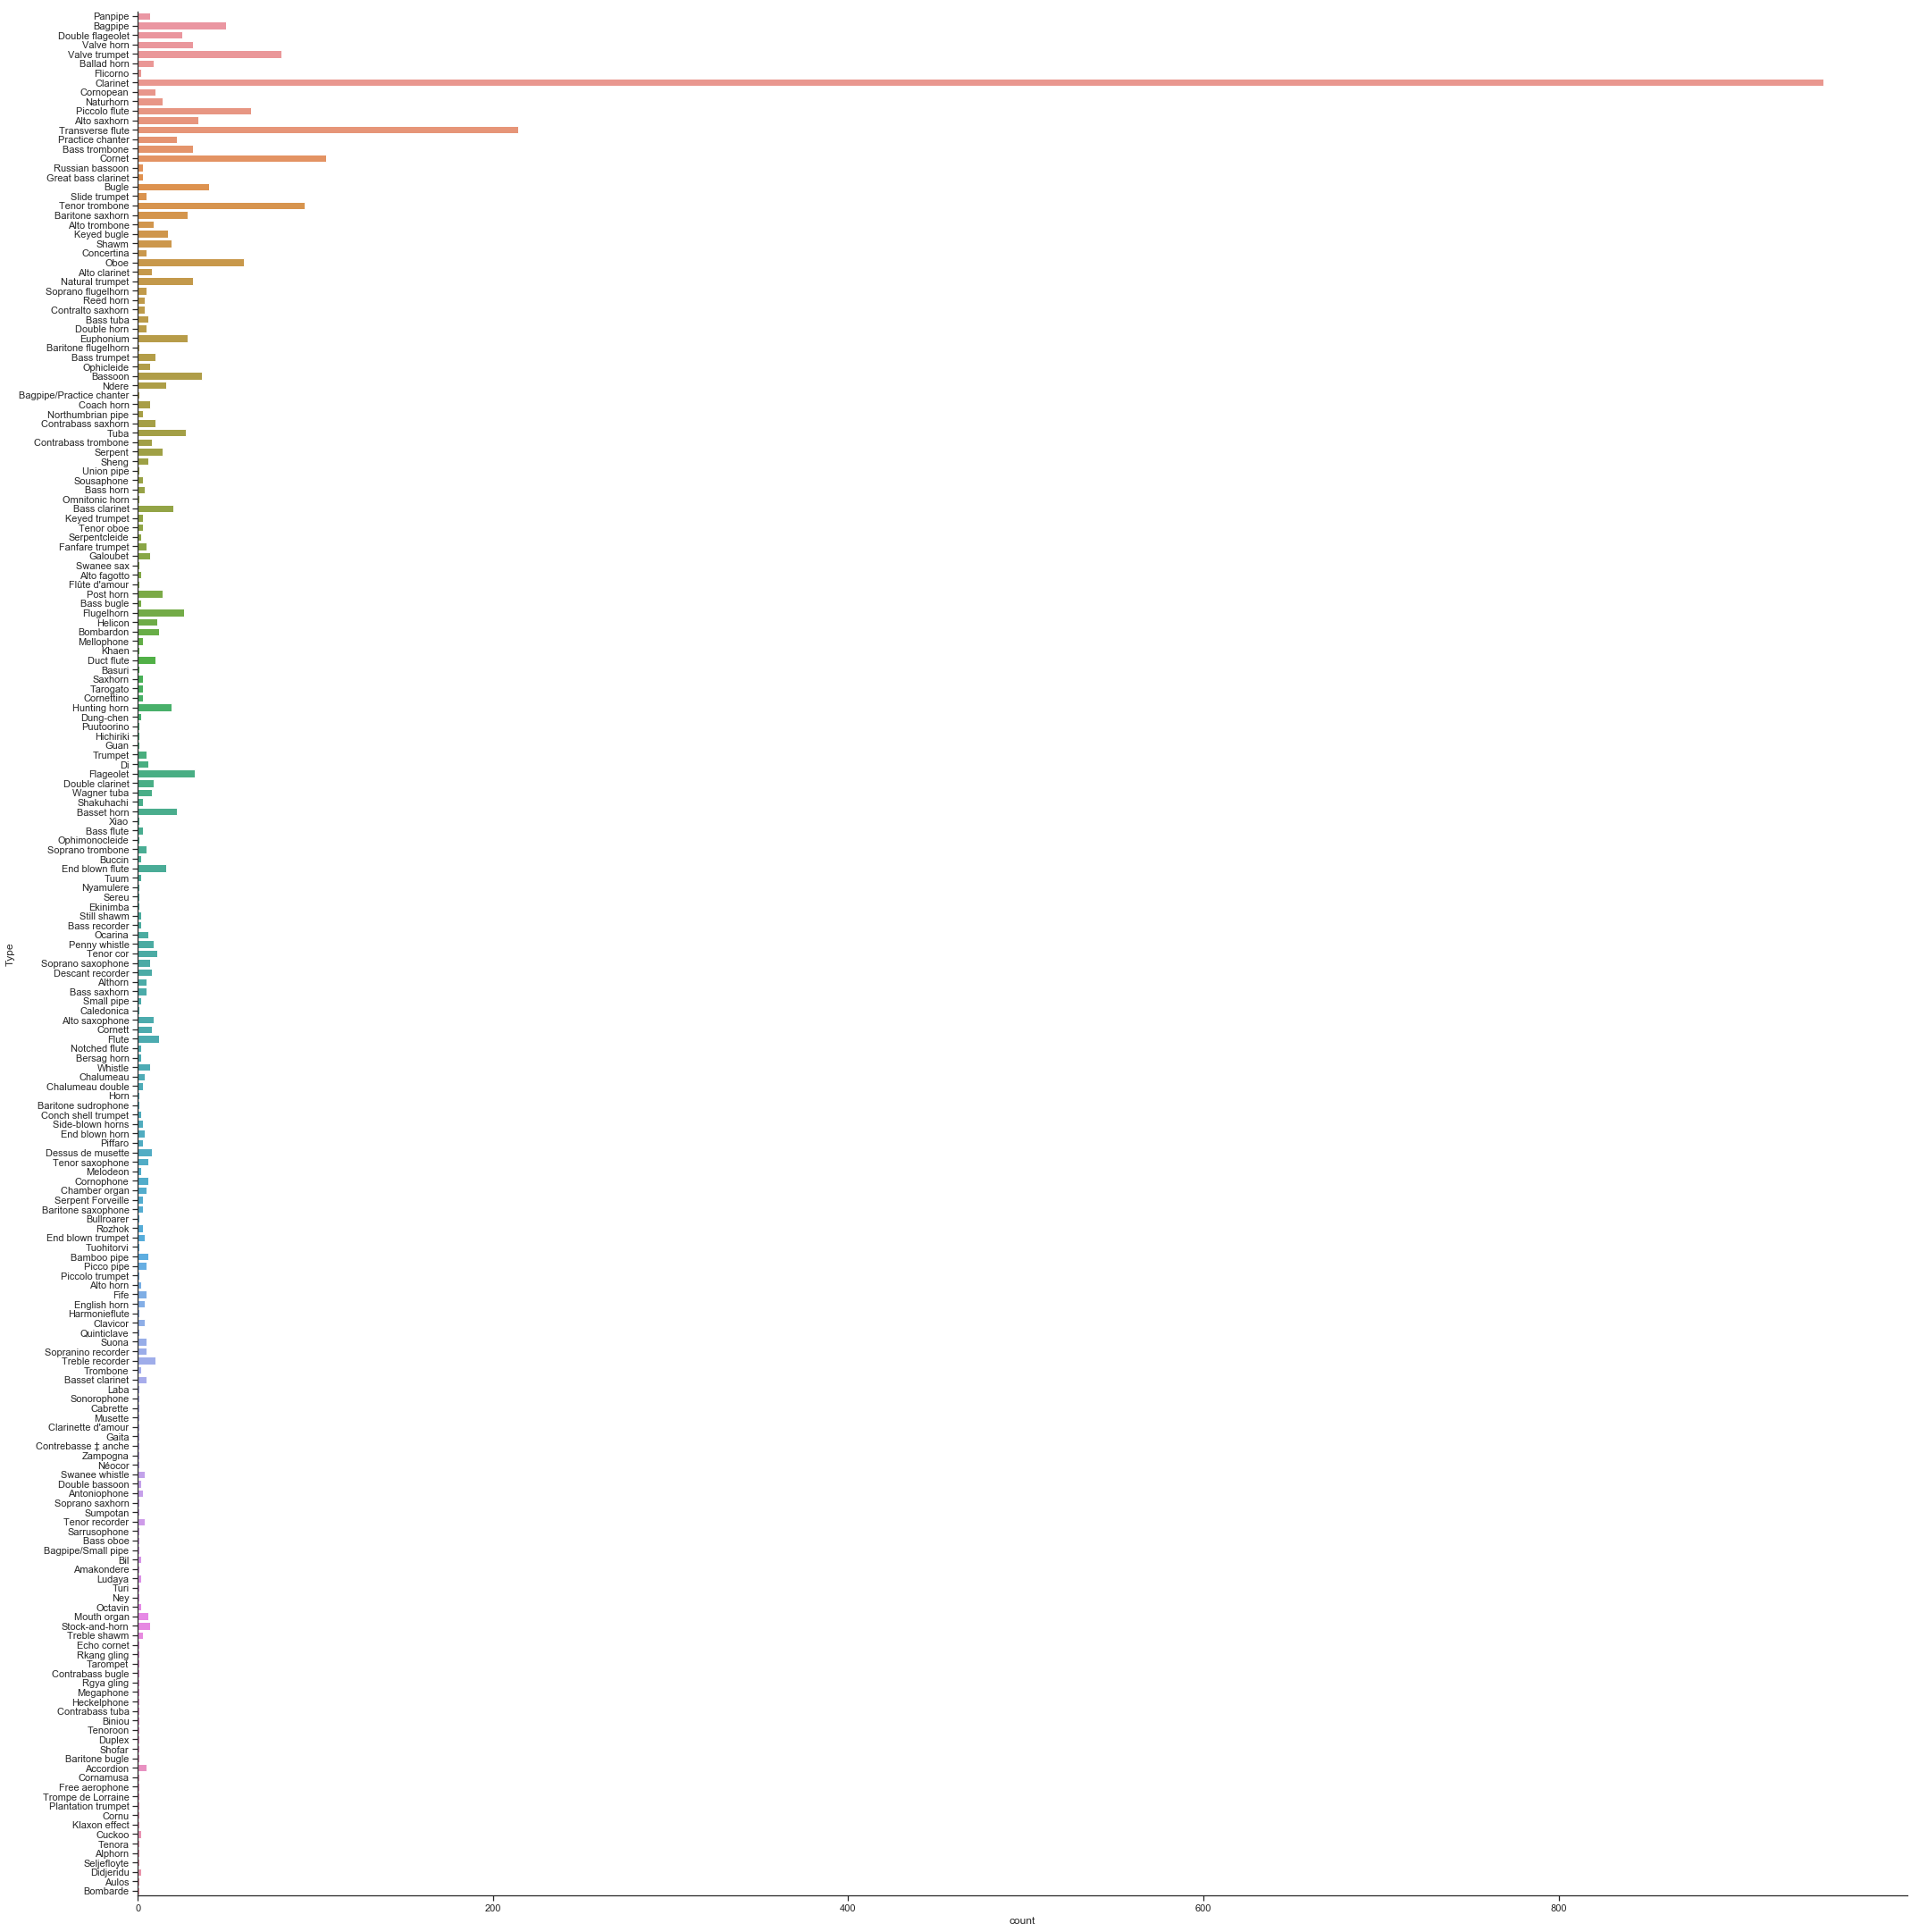

In [15]:
clarinets = mimed[mimed["Genus"] == "Clarinets"]
sns.catplot(y="Type", kind="count", data=wind, height=30)

## Time Visualizations

Visualize items per Family per year:

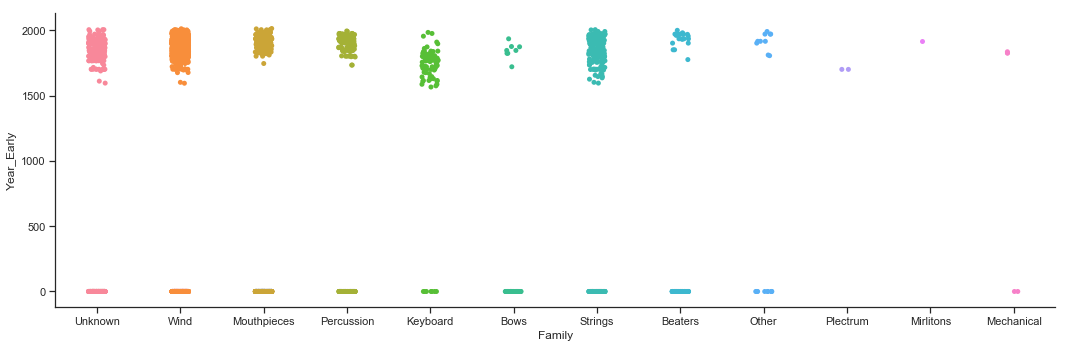

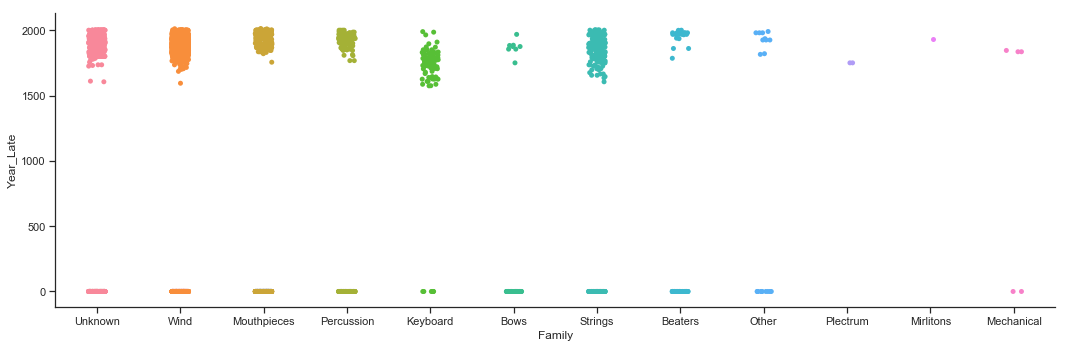

In [19]:
sns.catplot(x="Family", y="Year_Early", data=mimed, aspect=3)
sns.catplot(x="Family", y="Year_Late", data=mimed, aspect=3)

Visualize items with known years, per family per year:

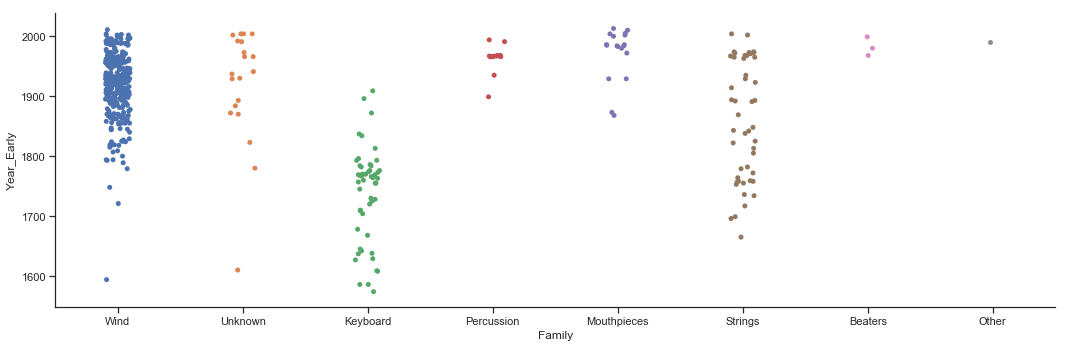

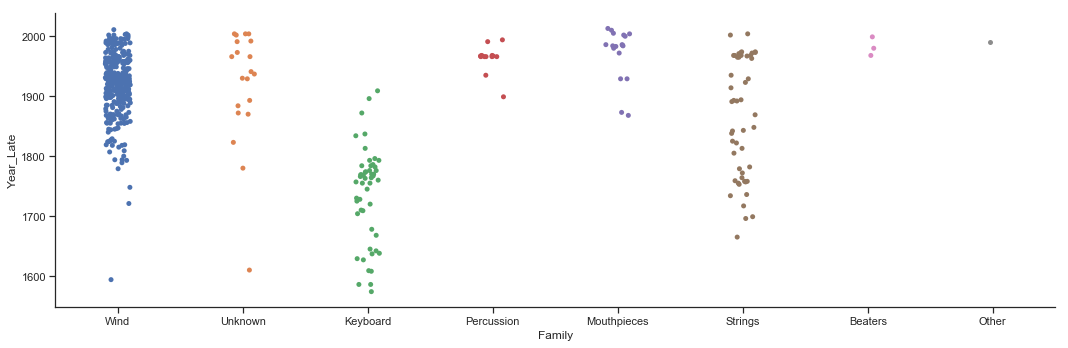

In [52]:
known_years = mimed[mimed['Year_Uncertainty'] == 0]
sns.catplot(x="Family", y="Year_Early", data=known_years, aspect=3)
sns.catplot(x="Family", y="Year_Late", data=known_years, aspect=3)   # should show same plot as Early Year

Only a handful of instruments with known years!

(-1, 1)

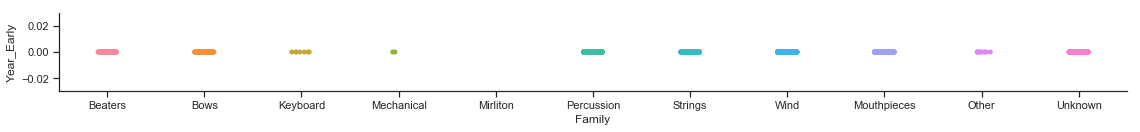

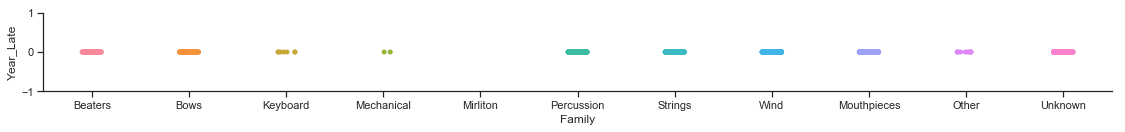

In [21]:
unknown_years = mimed[mimed['Year_Uncertainty'] == 2]
sns.catplot(x="Family", y="Year_Early", data=unknown_years, aspect=8, order=family_order, height=2)
sns.catplot(x="Family", y="Year_Late", data=unknown_years, aspect=8, order=family_order, height=2)
plt.ylim(-1,1)

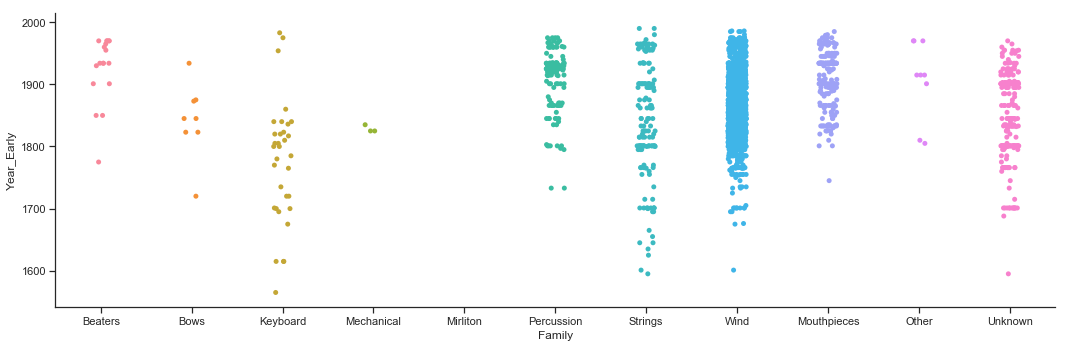

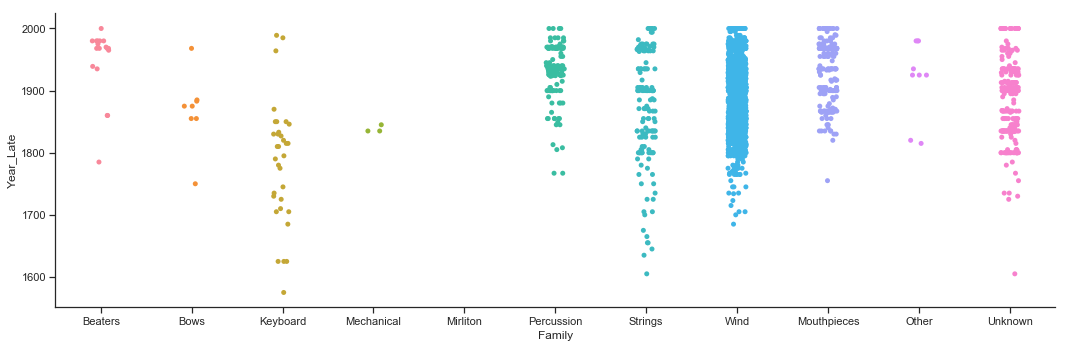

In [22]:
est_years = mimed[mimed['Year_Uncertainty'] == 1]
sns.catplot(x="Family", y="Year_Early", data=est_years, aspect=3, order=family_order)
sns.catplot(x="Family", y="Year_Late", data=est_years, aspect=3, order=family_order)

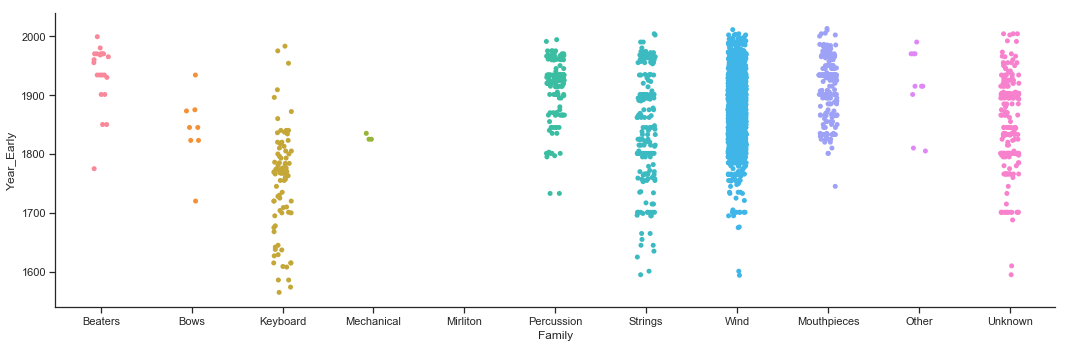

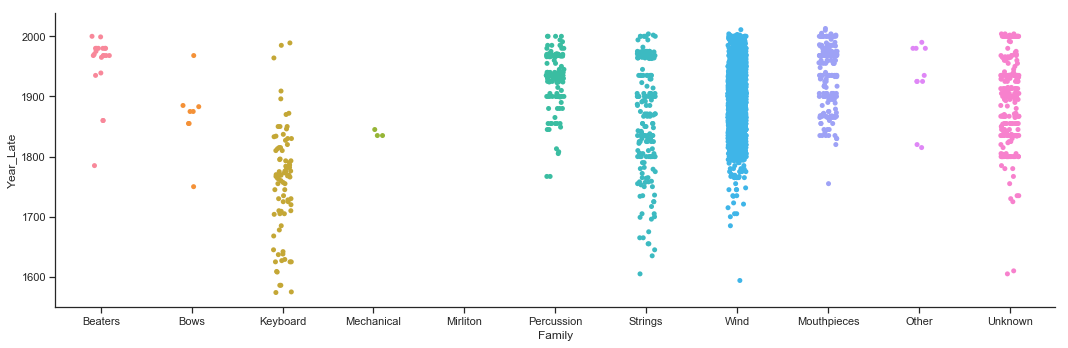

In [23]:
est_known_years = mimed[mimed['Year_Uncertainty'] < 2]
sns.catplot(x="Family", y="Year_Early", data=est_known_years, aspect=3, order=family_order)
sns.catplot(x="Family", y="Year_Late", data=est_known_years, aspect=3, order=family_order)

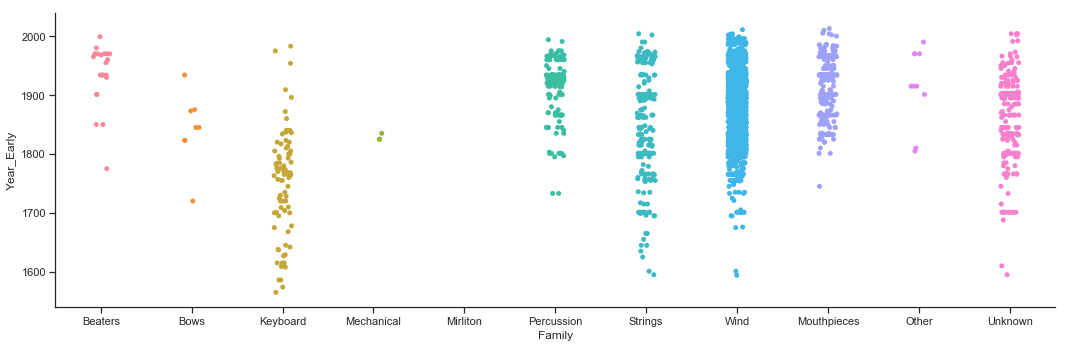

In [24]:
mimed_with_earlyyear = mimed[mimed["Year_Early"] > 0]
sns.catplot(x="Family", y="Year_Early", data=mimed_with_earlyyear, aspect=3, order=family_order)

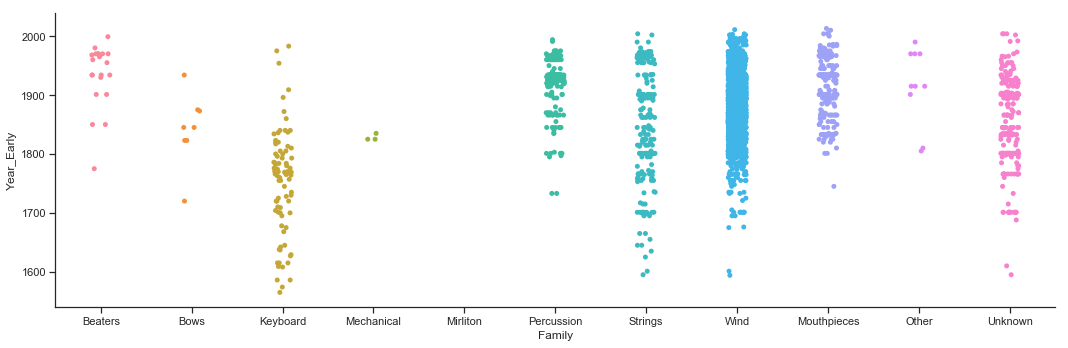

In [25]:
mimed_with_lateyear = mimed[mimed["Year_Late"] > 0]
sns.catplot(x="Family", y="Year_Early", data=mimed_with_lateyear, aspect=3, order=family_order)

## Location Visualizations

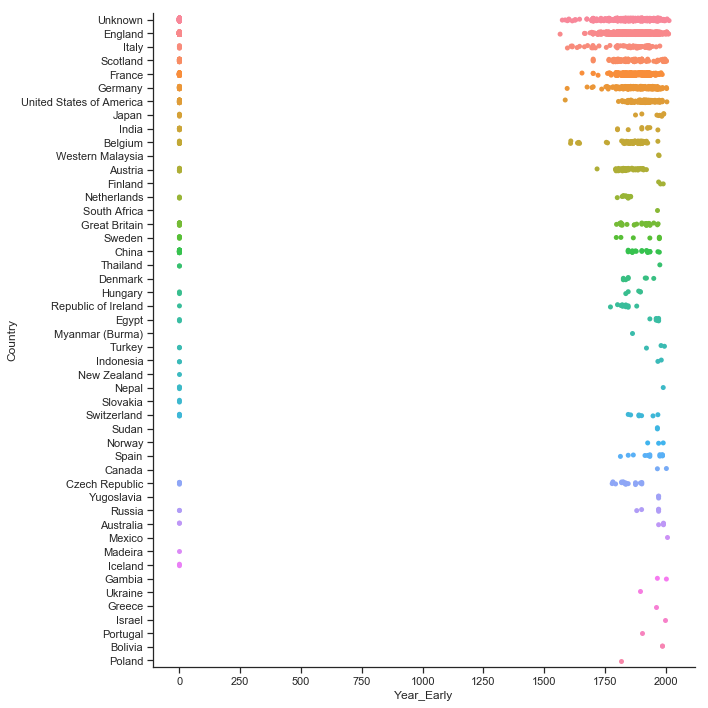

In [26]:
sns.catplot(x="Year_Early", y="Country", data=mimed, height=10, aspect=1)

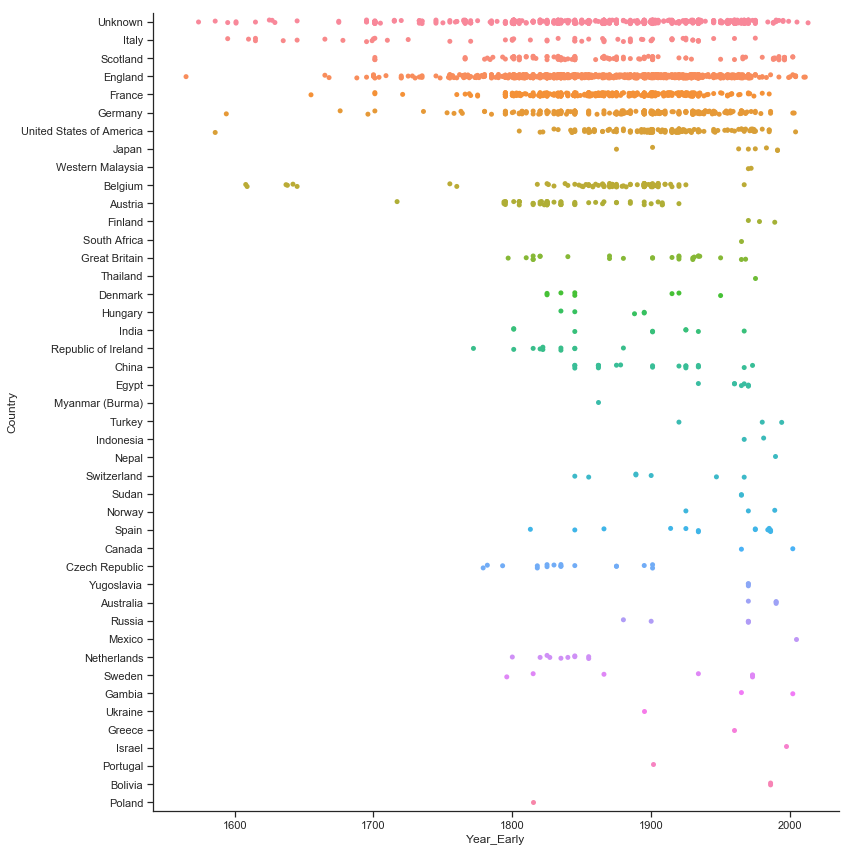

In [27]:
sns.catplot(x="Year_Early", y="Country", data=mimed_with_earlyyear, height=12, aspect=1)

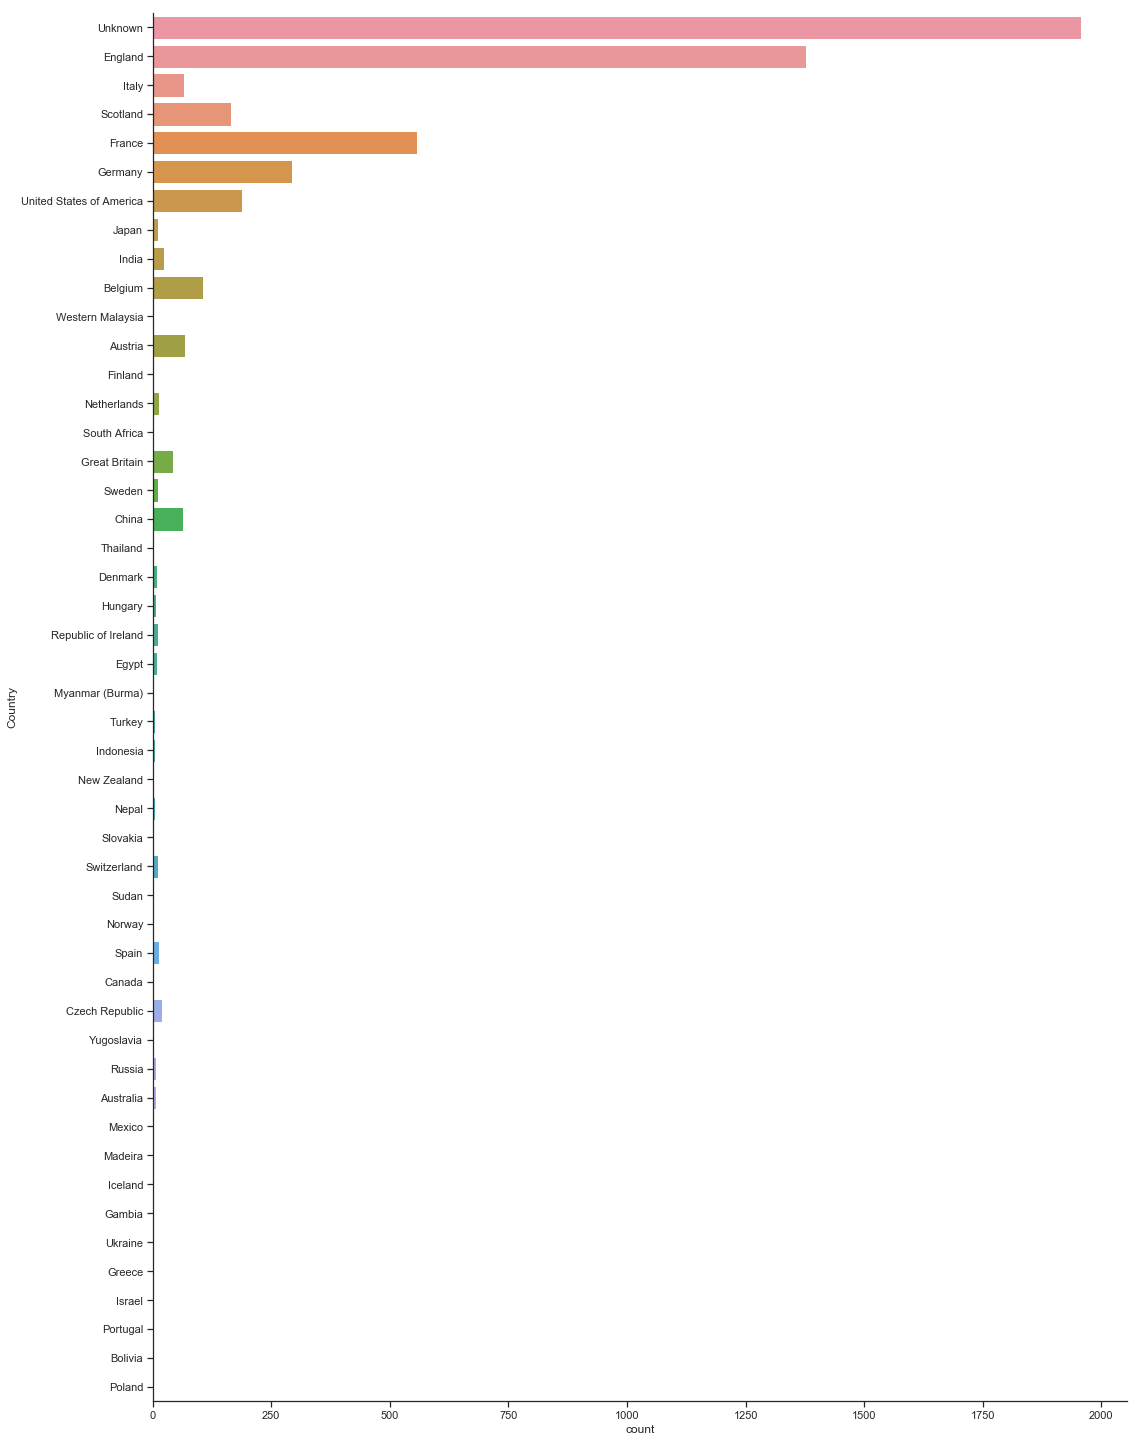

In [28]:
sns.catplot(y="Country", kind="count", data=mimed, height=20, aspect=.8)

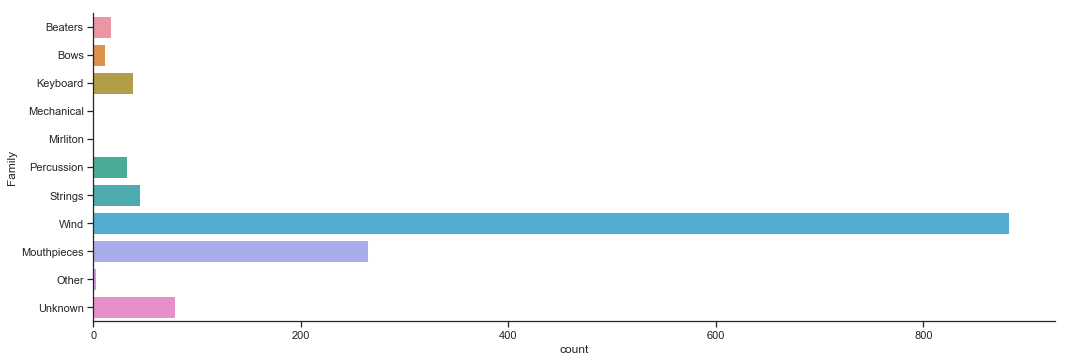

In [29]:
england = mimed[mimed["Country"] == "England"]
sns.catplot(y="Family", kind="count", data=england, height=5, aspect=3, order=family_order)

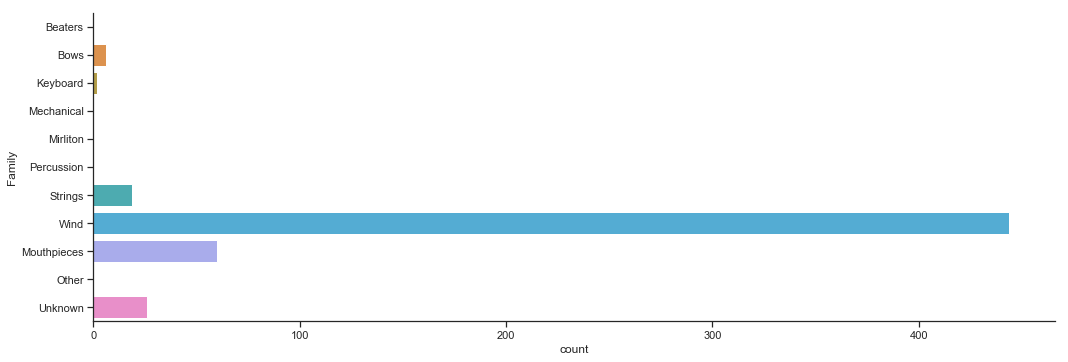

In [30]:
france = mimed[mimed["Country"] == "France"]
sns.catplot(y="Family", kind="count", data=france, height=5, aspect=3, order=family_order)
# plt.xlim(0,500)

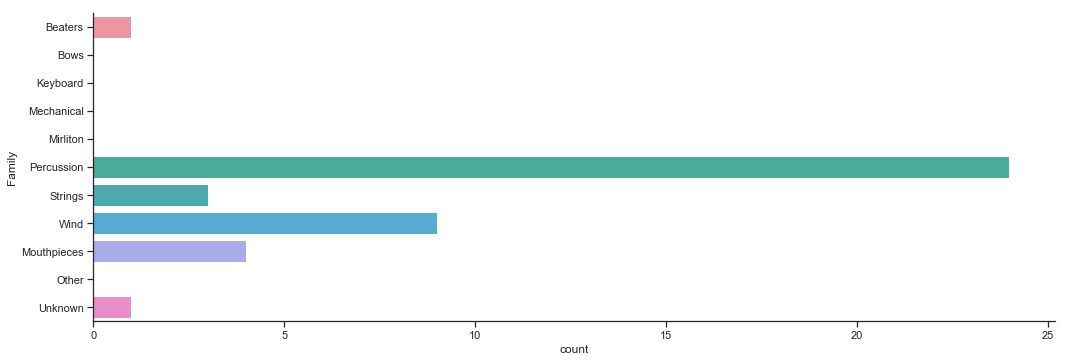

In [31]:
gb = mimed[mimed["Country"] == "Great Britain"]
sns.catplot(y="Family", kind="count", data=gb, height=5, aspect=3, order=family_order)
# plt.xlim(0,500)

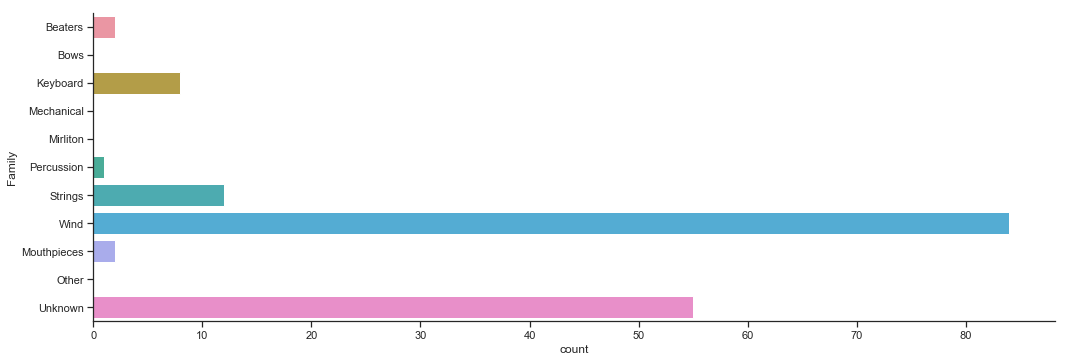

In [32]:
scotland = mimed[mimed["Country"] == "Scotland"]
sns.catplot(y="Family", kind="count", data=scotland, height=5, aspect=3, order=family_order)
# plt.xlim(0,500)

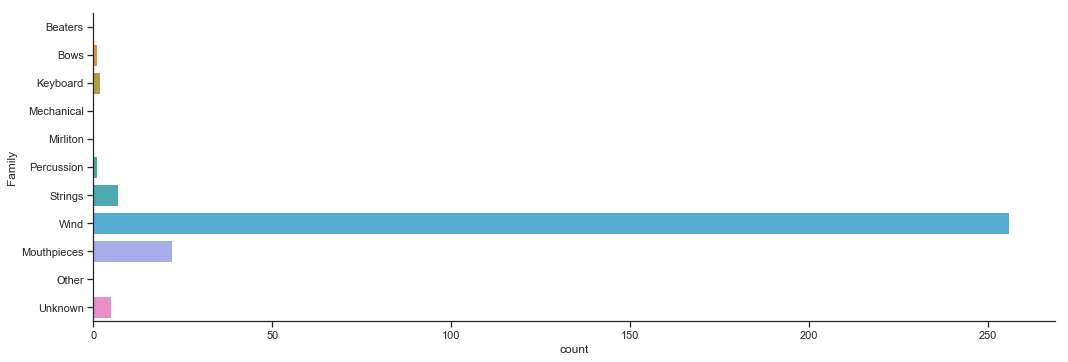

In [33]:
germany = mimed[mimed["Country"] == "Germany"]
sns.catplot(y="Family", kind="count", data=germany, height=5, aspect=3, order=family_order)
# plt.xlim(0,500)

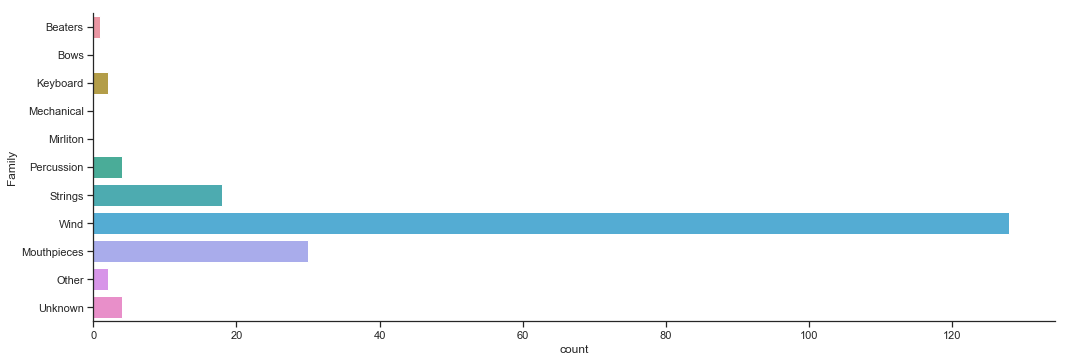

In [34]:
usa = mimed[mimed["Country"] == "United States of America"]
sns.catplot(y="Family", kind="count", data=usa, height=5, aspect=3, order=family_order)
# plt.xlim(0,500)

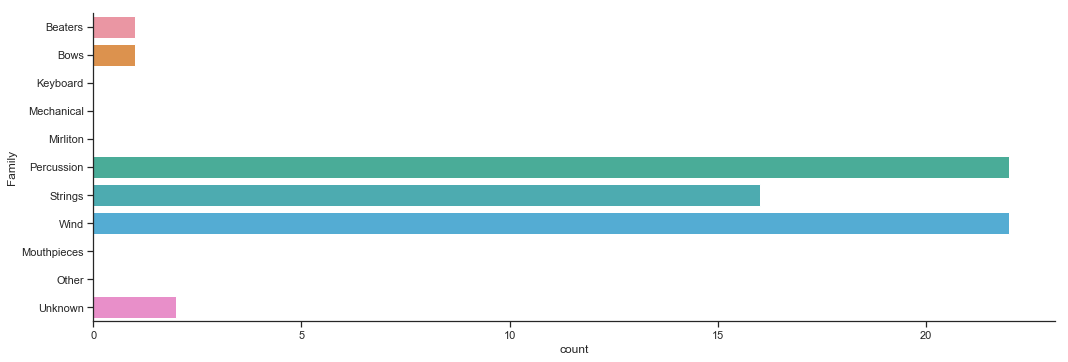

In [35]:
china = mimed[mimed["Country"] == "China"]
sns.catplot(y="Family", kind="count", data=china, height=5, aspect=3, order=family_order)
# plt.xlim(0,500)

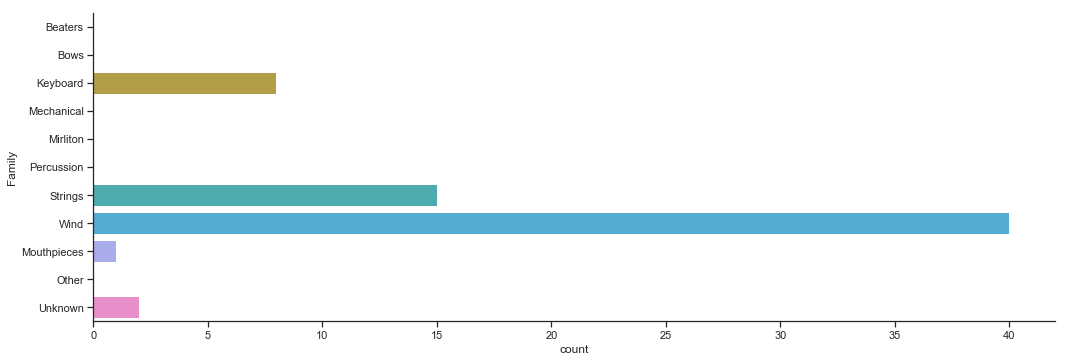

In [36]:
italy = mimed[mimed["Country"] == "Italy"]
sns.catplot(y="Family", kind="count", data=italy, height=5, aspect=3, order=family_order)
# plt.xlim(0,500)

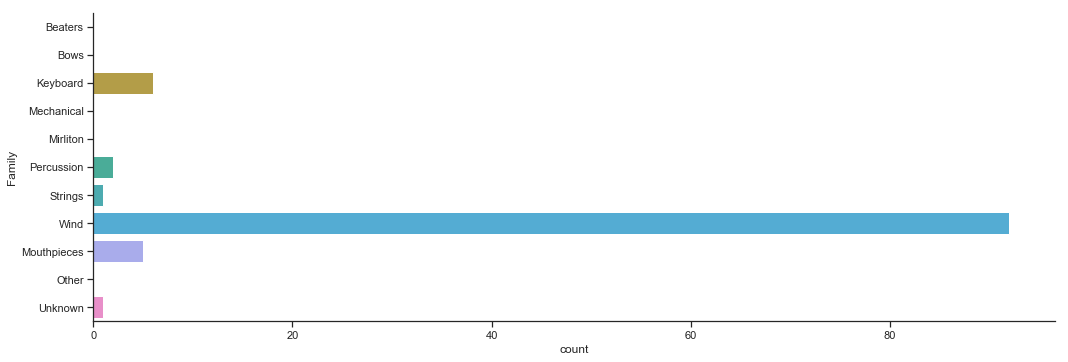

In [37]:
belgium = mimed[mimed["Country"] == "Belgium"]
sns.catplot(y="Family", kind="count", data=belgium, height=5, aspect=3, order=family_order)
# plt.xlim(0,500)

## Classification Visualizations

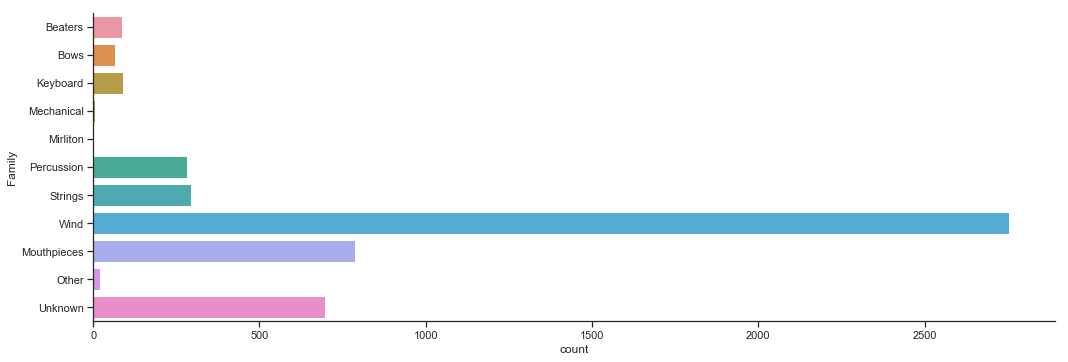

In [38]:
sns.catplot(y="Family", kind="count", data=mimed, height=5, aspect=3, order=family_order)

In [39]:
families = mimed["Family"].unique()
for f in families:
    if (f != "Unknown"):
        family = mimed[mimed["Family"] == f]
        genera = family["Genus"].unique()
        genera_count = len(genera)
        item_count = family.shape[0]
        if (genera_count > 1 and item_count > 1):
            print(f+": "+str(genera_count)+" genera, "+str(item_count)+" items")
        else:
            if (genera_count > 1 and item_count == 1):
                print(f+": "+str(genera_count)+" genus, "+str(item_count)+" item")
            else:
                if (genera_count == 1 and item_count > 1):
                    print(f+": "+str(genera_count)+" genus, "+str(item_count)+" items")
                else:
                    print(f+": "+str(genera_count)+" genus, "+str(item_count)+" item")

Wind: 23 genera, 2755 items
Mouthpieces: 1 genus, 788 items
Percussion: 16 genera, 282 items
Keyboard: 5 genera, 91 items
Bows: 1 genus, 65 items
Strings: 17 genera, 295 items
Beaters: 1 genus, 88 items
Other: 1 genus, 20 items
Plectrum: 1 genus, 2 items
Mirlitons: 1 genus, 1 item
Mechanical: 1 genus, 5 items


In [40]:
mimed[mimed["Family"] == "Other"]

,Id,Collection,Type,Genus,Family,Year_Early,Year_Late,Year_Uncertainty,Country,City,Location_Uncertainty
Row,,,,,,,,,,,
305,177388,10683/14558,Flexatone,Unknown,Other,0,0,2,United States of America,Unknown,0
309,177396,10683/14558,Pianino,Unknown,Other,1805,1815,1,England,London,0
321,177408,10683/14558,Musical glasses,Unknown,Other,0,0,2,Unknown,Unknown,1
322,177410,10683/14558,Musical glasses,Unknown,Other,0,0,2,Unknown,Unknown,1
323,177412,10683/14558,Musical glasses,Unknown,Other,0,0,2,Unknown,Unknown,1
752,178501,10683/14558,Unknown,Unknown,Other,1901,1935,1,Unknown,Unknown,1
1796,180863,10683/14558,Claves,Unknown,Other,0,0,2,Unknown,Unknown,2
2076,181476,10683/14558,Wind machine,Unknown,Other,1915,1925,1,Unknown,Unknown,2
2752,178018,10683/14558,Triangle,Unknown,Other,1970,1980,1,England,Unknown,0


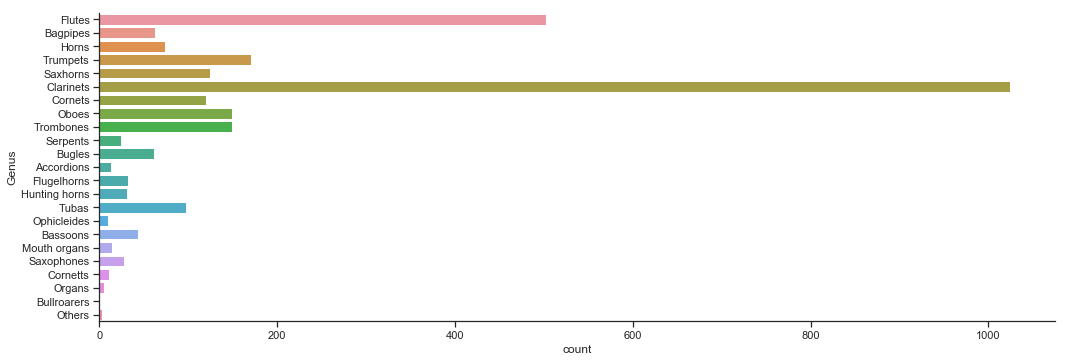

In [41]:
wind = mimed[mimed["Family"] == "Wind"]
sns.catplot(y="Genus", kind="count", data=wind, aspect=3)

In [42]:
wind_genera = wind["Genus"].unique()
print(wind_genera)
wind_genera_count = len(wind_genera)
print(wind_genera_count)

['Flutes' 'Bagpipes' 'Horns' 'Trumpets' 'Saxhorns' 'Clarinets' 'Cornets'
 'Oboes' 'Trombones' 'Serpents' 'Bugles' 'Accordions' 'Flugelhorns'
 'Hunting horns' 'Tubas' 'Ophicleides' 'Bassoons' 'Mouth organs'
 'Saxophones' 'Cornetts' 'Organs' 'Bullroarers' 'Others']
23


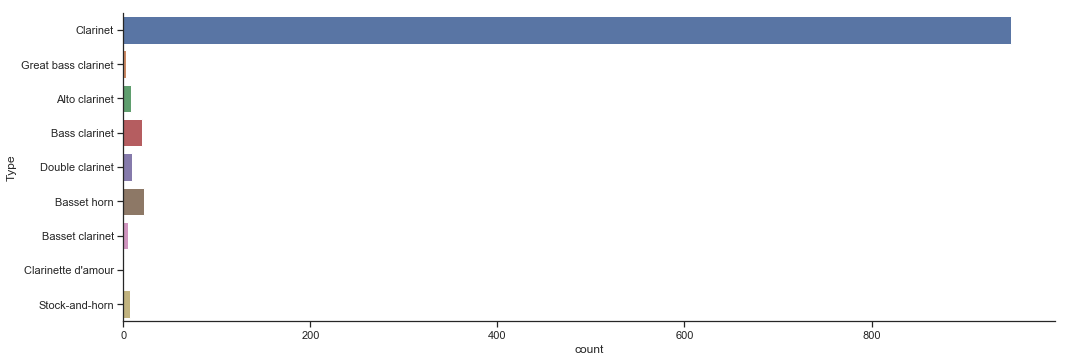

In [43]:
clarinets = mimed[mimed["Genus"] == "Clarinets"]
sns.catplot(y="Type", kind="count", data=clarinets, aspect=3)

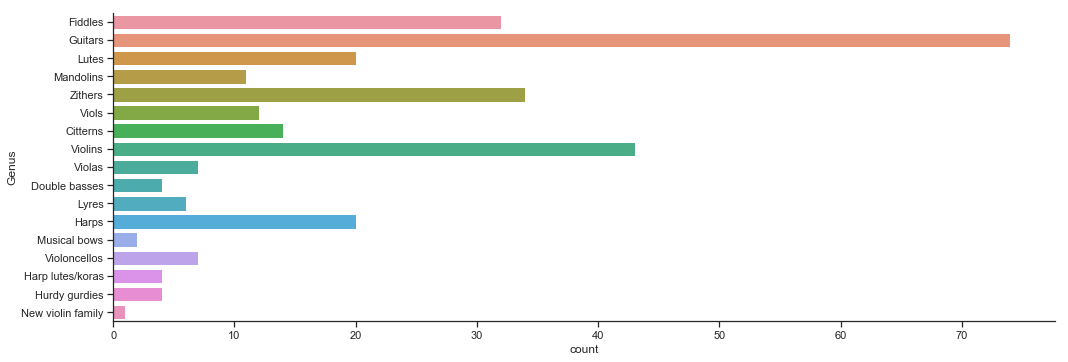

In [44]:
strings = mimed[mimed["Family"] == "Strings"]
sns.catplot(y="Genus", kind="count", data=strings, aspect=3)

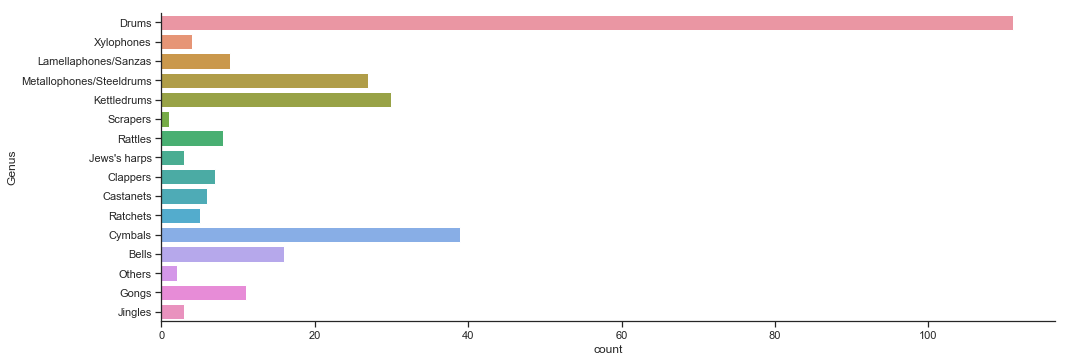

In [45]:
percussion = mimed[mimed["Family"] == "Percussion"]
sns.catplot(y="Genus", kind="count", data=percussion, aspect=3)

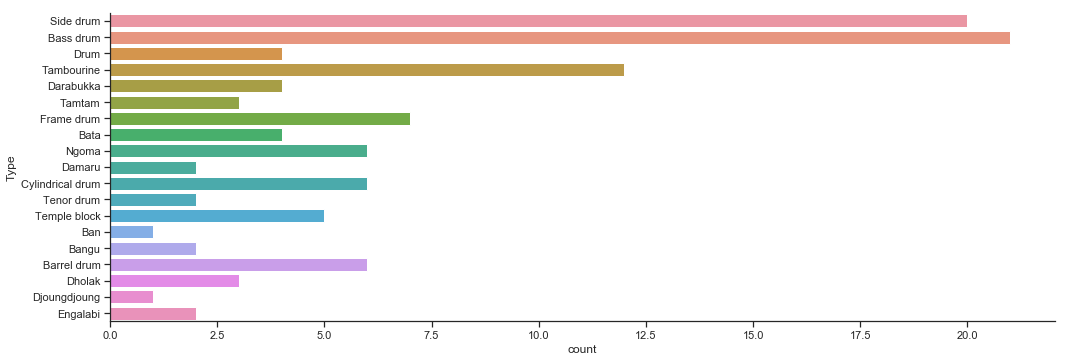

In [46]:
drums = mimed[mimed["Genus"] == "Drums"]
sns.catplot(y="Type", kind="count", data=drums, aspect=3)

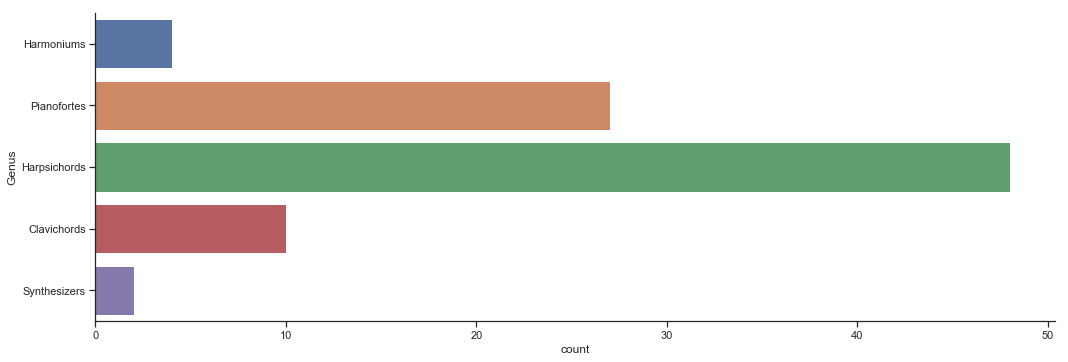

In [47]:
keyboard = mimed[mimed["Family"] == "Keyboard"]
sns.catplot(y="Genus", kind="count", data=keyboard, aspect=3)

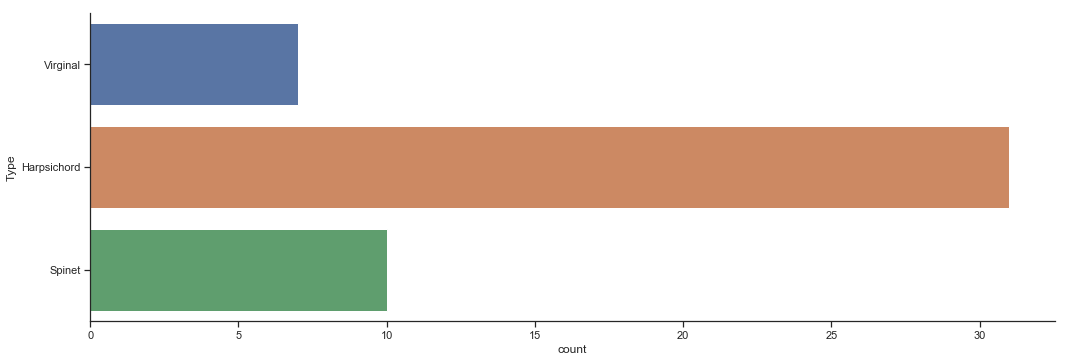

In [48]:
harpsichords = mimed[mimed["Genus"] == "Harpsichords"]
sns.catplot(y="Type", kind="count", data=harpsichords, aspect=3)

## New Data Files

Make sure rows have valid four-digit values where possible, so:
* If early is unknown (0), the late year is used
* If late is unkown (0), the early year is used

If early and late are unknown (0), keep both values at 0.

In [49]:
years_early = mimed["Year_Early"]
years_late = mimed["Year_Late"]
new_early_years = []
new_late_years = []
year_ranges = []
maxI = len(years_early) - 1
i = 0
while i <= maxI:
    new_early = 0
    new_late = 0
    early = int(years_early[i])
    late = int(years_late[i])
    if (early == 0 and late != 0):
        new_early = late
        new_late = late
    elif (late == 0 and early != 0):
        new_late = early
        new_early = early
    elif (early != 0 and late != 0):
        new_early = early
        new_late = late
    else:
        new_early = 0
        new_late = 0
    year_range = new_late - new_early
    year_ranges += [year_range]
    new_early_years += [new_early]
    new_late_years += [new_late]
    i += 1

assert len(new_late_years) == len(years_early)
assert len(new_early_years) == len(years_late)
assert len(year_ranges) == len(years_early)

In [50]:
mimed["Year_Late"] = new_late_years
mimed["Year_Early"] = new_early_years
mimed["Year_Range"] = year_ranges
mimed.tail()

,Id,Collection,Type,Genus,Family,Year_Early,Year_Late,Year_Uncertainty,Country,City,Location_Uncertainty,Year_Range
Row,,,,,,,,,,,,
5083,181951,10683/14558,Clarinet,Clarinets,Wind,0,0,2,Germany,Unknown,0,0
5084,181953,10683/14558,Transverse flute,Flutes,Wind,0,0,2,Republic of Ireland,Dublin,0,0
5085,181954,10683/14558,Clarinet,Clarinets,Wind,1910,1910,0,France,Paris,0,0
5086,181955,10683/14558,Transverse flute,Flutes,Wind,1766,1816,1,England,London,0,50
5087,181956,10683/14558,Clarinet,Clarinets,Wind,0,0,2,England,London,0,0


Export new csv file:

In [51]:
mimed.to_csv('Data/clean_mimed_with_range.csv', sep=',', encoding='utf-8')